#### Helper Functions

In [31]:
# Plot colors
lblue="#a6cee3"
blue = "#1f78b4"
lgreen = "#b2df8a"
green = "#33a02c"
black= "#424242"


from os import path, remove
import csv
import subprocess
from pandas import read_csv
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def get_results(tsvname):
    times=[]
    with open("experiments_results/"+tsvname+".results", newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter='\t')
        for row in csvreader:
            if len(row)>0:
                splitrow = row[0].split()
                lastval = splitrow[len(splitrow) - 1]
                if (lastval[0].isdigit()):
                    times.append(float(lastval))
    return times


def fullConfiguration():
    return True


#### Figure 2

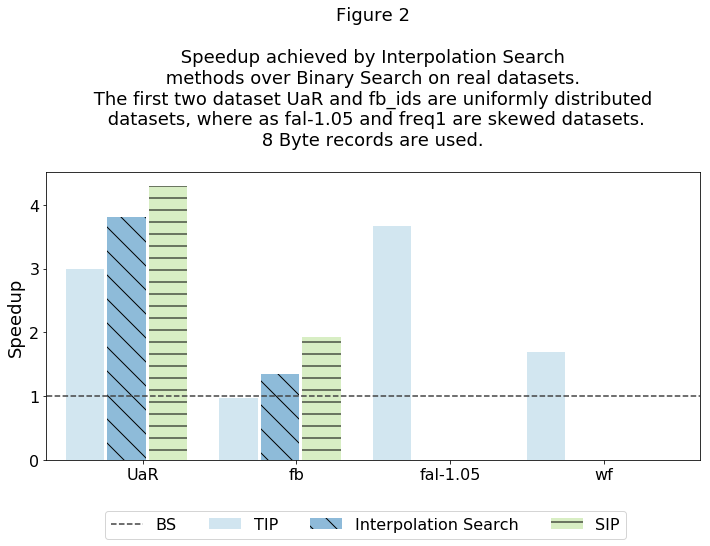

In [32]:
tsv = "fig2.tsv"

results=get_results(tsv)

uarResults=results[0:4]
fbidsResults=results[4:8]
falResults=results[8:10]
freq1Results=results[10:12]

# Calculate speedups of sip, is and tip compard to Binary Search
uarSpeedups = []
for i in range(1,len(uarResults)):
    uarSpeedups.append(uarResults[0]/uarResults[i])

fbidsSpeedups = []
for i in range(1,len(fbidsResults)):
    fbidsSpeedups.append(fbidsResults[0]/fbidsResults[i])

falSpeedups = []
for i in range(1,len(falResults)):
    falSpeedups.append(falResults[0]/falResults[i])

freq1Speedups = []
for i in range(1,len(freq1Results)):
    freq1Speedups.append(freq1Results[0]/freq1Results[i])


# Plot
# Group the speedups by algorithm
sipSpeedups=[uarSpeedups[0], fbidsSpeedups[0],0,0]
ISSpeedups=[uarSpeedups[1], fbidsSpeedups[1],0,0]
tipSpeedups=[uarSpeedups[2], fbidsSpeedups[2],falSpeedups[0], freq1Speedups[0]]

labels=["UaR", "fb", "fal-1.05", "wf"]
pos = [0,1,2,3]
width = 0.25 

caption = "Figure 2\n\n Speedup achieved by Interpolation Search \n methods over Binary Search on real datasets. \n The first two dataset UaR and fb_ids are uniformly distributed \n datasets, where as fal-1.05 and freq1 are skewed datasets.\n 8 Byte records are used. \n"

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(pos, 
        tipSpeedups, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="TIP") 

plt.bar([p + width+.02 for p in pos], 
        ISSpeedups,
        width, 
        alpha=0.5, 
        color=blue, 
        label="Interpolation Search",
        hatch="\\") 

plt.bar([p + width*2+.04 for p in pos], 
        sipSpeedups,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="SIP",
        hatch="-") 

plt.plot([-1,5],[1,1],linestyle="dashed", color=black, label="BS")

ax.set_ylabel('Speedup', size=18)

ax.set_title(caption, size=18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
ax.set_xticklabels(labels, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
# plt.legend(prop={'size': 22}, ncol=3, loc='upper right', bbox_to_anchor=(0.7, -0.15))
plt.legend(['BS','TIP', 'Interpolation Search', 'SIP'], ncol=4, bbox_to_anchor=(.9, -0.15), loc='upper right',prop={'size': 16})
plt.tight_layout()
plt.gcf().savefig('./figures/fig2.pdf', format='pdf')

#### Figure 5

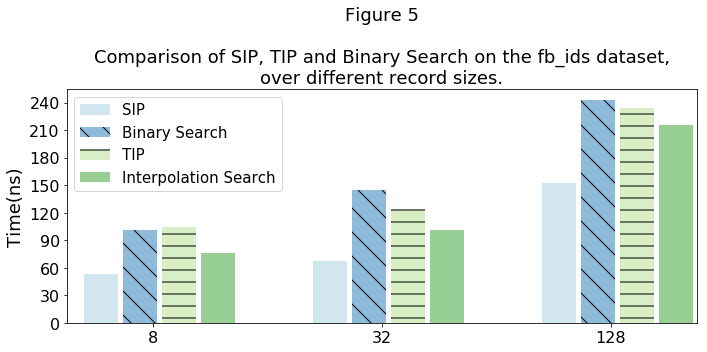

In [33]:
tsv="fig5.tsv"

results=get_results(tsv)

# Group the results by algorithm
sipResult=[results[0], results[4], results[8]]
bsResult=[results[1], results[5], results[9]]
tipResult=[results[2], results[6], results[10]]
isResult=[results[3], results[7], results[11]]

pos = [0,1,2]
width = 0.15 

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        sipResult, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="SIP") 

plt.bar([p + (width+.02)*1 for p in pos], 
        bsResult,
        width, 
        alpha=0.5, 
        color=blue, 
        label="Binary Search",
        hatch="\\") 

plt.bar([p + (width+.02)*2 for p in pos], 
        tipResult,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="TIP",
        hatch="-")

plt.bar([p + (width+.02)*3 for p in pos], 
        isResult,
        width, 
        alpha=0.5, 
        color=green, 
        label="Interpolation Search") 

ax.set_ylabel('Time(ns)', size=18)

ax.set_title('Figure 5', size=22)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
ax.set_xticklabels(["8","32","128"], size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
caption = "Figure 5\n\nComparison of SIP, TIP and Binary Search on the fb_ids dataset,\nover different record sizes."
plt.title(caption, size=18)
plt.tight_layout()
plt.legend(['SIP', 'Binary Search', 'TIP', 'Interpolation Search' ], loc='upper right')
plt.legend(prop={'size': 15})


plt.gcf().savefig('./figures/fig5.pdf', format='pdf')

#### Figure 6

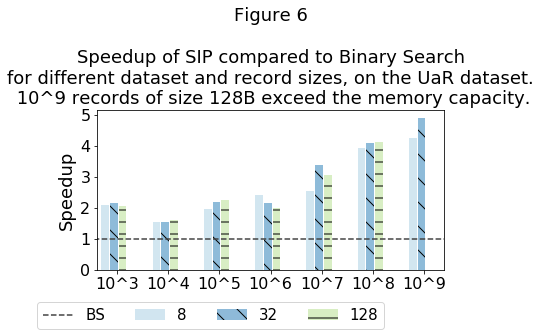

In [34]:
tsv8="fig6_8.tsv"
tsv32="fig6_32.tsv"
tsv128="fig6_128.tsv"

results8=get_results(tsv8)
fig6_results8 = results8
results32=get_results(tsv32)
results128=get_results(tsv128)


groupedByRecordSize = [[],[],[]]
for i in range(len(results8)//2):
    groupedByRecordSize[0].append(results8[i]/results8[len(results8)//2 + i])

for i in range(len(results32)//2):
    groupedByRecordSize[1].append(results32[i]/results32[len(results32)//2 + i])
    
for i in range(len(results128)//2):
    groupedByRecordSize[2].append(results128[i]/results128[len(results128)//2 + i])

datasetSizes=[3,4,5,6,7]
if len(results8) > 10:
    datasetSizes=[3,4,5,6,7,8,9]
    groupedByRecordSize[2].append(0)

pos = [i for i in range(len(datasetSizes))]
width = 0.15

fig, ax = plt.subplots(figsize=(7,5))

plt.bar(pos, 
        groupedByRecordSize[0], 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="8") 

plt.bar([p + (width+.02)*1 for p in pos], 
        groupedByRecordSize[1],
        width, 
        alpha=0.5, 
        color=blue, 
        label="32",
        hatch="\\") 

plt.bar([p + (width+.02)*2 for p in pos], 
        groupedByRecordSize[2],
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="128",
        hatch="-")

plt.plot([-1,len(datasetSizes)],[1,1],linestyle="dashed", color=black, label="BS")

ax.set_ylabel('Speedup', size=18)

ax.set_title('Figure 6', size=22)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
xticks=["10^"+str(i) for i in datasetSizes]
ax.set_xticklabels(xticks, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, ncol=4, loc='upper right', bbox_to_anchor=(0.85, -0.15))
caption = "Figure 6\n\nSpeedup of SIP compared to Binary Search\nfor different dataset and record sizes, on the UaR dataset.\n 10^9 records of size 128B exceed the memory capacity."
plt.title(caption, size=18)
plt.tight_layout()
plt.gcf().savefig('./figures/fig6.pdf', format='pdf')

#### Figure 7

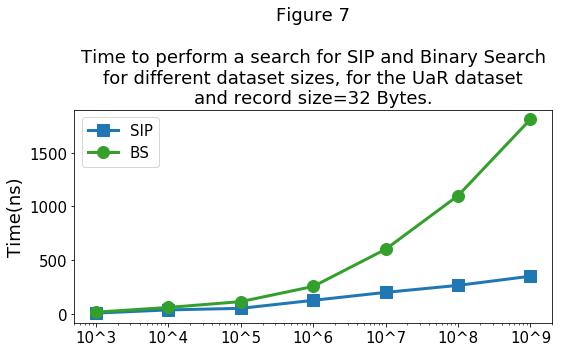

In [35]:
tsv="fig7.tsv"

results=get_results(tsv)

datasetSizes=[3,4,5,6,7]
if len(results) > 10:
    datasetSizes=[3,4,5,6,7,8,9]

# Group the results by algorithm
bsResults=results[0:(len(results)//2)]
sipResults=results[(len(results)//2):len(results)]

fig, ax = plt.subplots(figsize=(8,5))
plt.plot([10**i for i in datasetSizes], sipResults, color=blue,marker="s", markersize=12, linewidth=3, label="SIP")
plt.plot([10**i for i in datasetSizes], bsResults, color=green,marker="o", markersize=12, linewidth=3, label="BS")

ax.set_ylabel('Time(ns)', size=18)
ax.set_title('Figure 7', size=22)
ax.set_xscale('log')

# Set the position of the x ticks
ax.set_xticks([10**i for i in datasetSizes] )
ax.set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
ax.tick_params(axis="y", labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='upper left')
caption = "Figure 7\n\nTime to perform a search for SIP and Binary Search\nfor different dataset sizes, for the UaR dataset\nand record size=32 Bytes."
plt.title(caption, size=18)
plt.tight_layout()
plt.gcf().savefig('./figures/fig7.pdf', format='pdf')

#### Figure 8

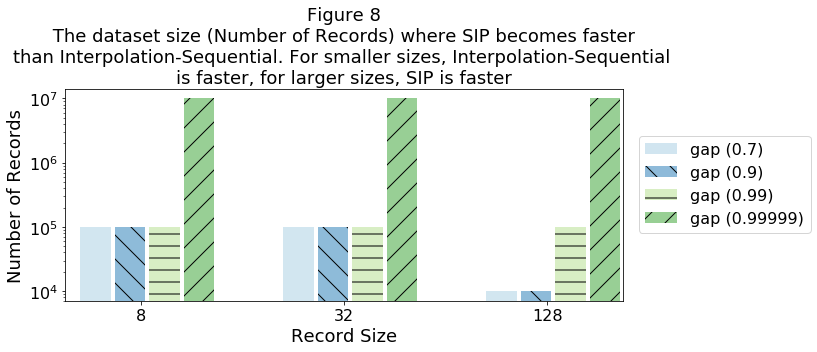

In [36]:
tsv1="fig8_1.tsv"
tsv2="fig8_2.tsv"
tsv3="fig8_3.tsv"
tsv4="fig8_4.tsv"

gapShapes = [0.7, 0.9, 0.99, 0.99999]
recordSizes = [8, 32, 128]
algorithms = ["isseq", "sip"]

results1=get_results(tsv1)
results2=get_results(tsv2)
results3=get_results(tsv3)
results4=get_results(tsv4)

datasetSizes = [4, 5, 6, 7]   
if len(datasetSizes) > 24:
    datasetSizes = [4, 5, 6, 7, 8]    

def analyze_results(results):
    res = [0,0,0]
    i = 0
    sizePerRecordSize = len(results) // 3 
    temp8=[0,0,0,0,0]
    temp32=[0,0,0,0,0]
    temp128=[0,0,0,0,0]
    while( i < sizePerRecordSize ):
        if results[i+1] < results[i]:
            temp8[i//2] = 1
        i += 2
    while( i < sizePerRecordSize*2 ):
        if results[i+1] < results[i]:
            temp32[(i-sizePerRecordSize)//2] = 1
        i += 2
    while( i < sizePerRecordSize*3 ):
        if results[i+1] < results[i]:
            temp128[(i-sizePerRecordSize*2)//2] = 1
        i += 2
    for i in range(len(temp8)):
        if temp8[i] == 1:
            res[0] = 10**datasetSizes[i]
            break

    for i in range(len(temp32)):
        if temp32[i] == 1:
            res[1] = 10**datasetSizes[i]
            break
            
    for i in range(len(temp128)):
        if temp128[i] == 1:
            res[2] = 10**datasetSizes[i]
            break
    return res


shape1 = analyze_results(results1)
shape2 = analyze_results(results2)
shape3 = analyze_results(results3)
shape4 = analyze_results(results4)

pos = [0,1,2]
width = 0.15
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(pos, 
        shape1, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="gap (0.7)") 

plt.bar([p + width+.02 for p in pos], 
        shape2,
        width, 
        alpha=0.5, 
        color=blue, 
        label="gap (0.9)",
        hatch="\\") 

plt.bar([p + width*2+.04 for p in pos], 
        shape3,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="gap (0.99)",
        hatch="-") 

plt.bar([p + width*3+.06 for p in pos], 
        shape4,
        width, 
        alpha=0.5, 
        color=green, 
        label="gap (0.99999)",
        hatch="/") 


ax.set_ylabel('Number of Records', size=18)
ax.set_xlabel('Record Size', size=18)
ax.set_yscale('log')
caption = "Figure 8\n The dataset size (Number of Records) where SIP becomes faster \nthan Interpolation-Sequential. For smaller sizes, Interpolation-Sequential \nis faster, for larger sizes, SIP is faster"
ax.set_title(caption, size=18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
labels=["8","32","128"]
# Set the labels for the x ticks
ax.set_xticklabels(labels, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['gap (0.7)', 'gap (0.9)', 'gap (0.99)', 'gap (0.99999)'], bbox_to_anchor=(1.35, 0.55), loc='right',prop={'size': 16})

plt.tight_layout()
plt.gcf().savefig('./figures/fig8.pdf', format='pdf')

#### Figure 9

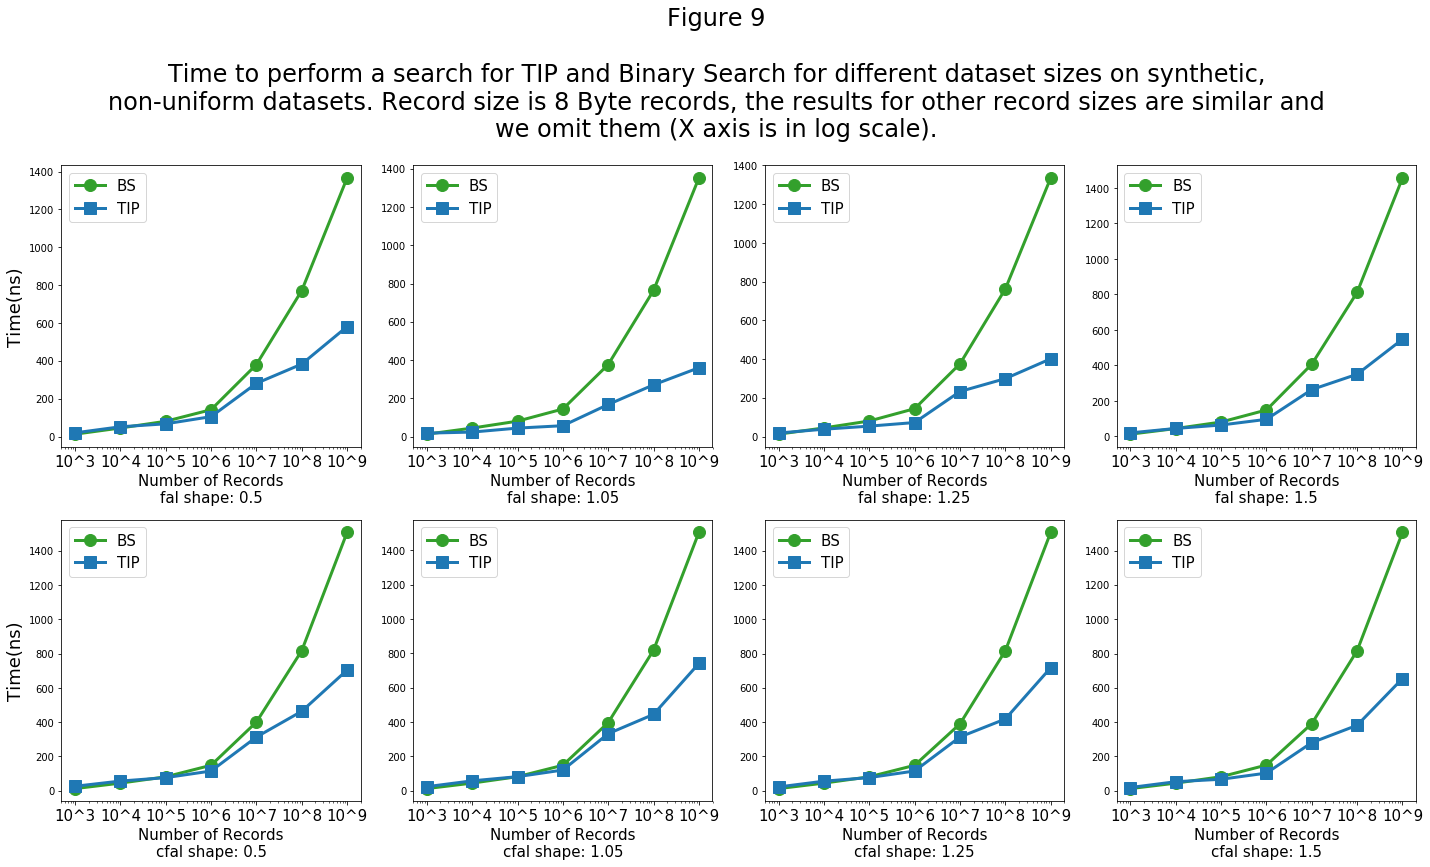

In [37]:
fal05=get_results("fig9_05_fal.tsv")
fal105=get_results("fig9_105_fal.tsv")
fal125=get_results("fig9_125_fal.tsv")
fal15=get_results("fig9_15_fal.tsv")

cfal05=get_results("fig9_05_cfal.tsv")
cfal105=get_results("fig9_105_cfal.tsv")
cfal125=get_results("fig9_125_cfal.tsv")
cfal15=get_results("fig9_15_cfal.tsv")

datasetSizes=[3,4,5,6,7]
if len(fal05) > 10:
    datasetSizes=[3,4,5,6,7,8,9]

shapes = [0.5,1.05,1.25,1.5]

resultAlgoLen = len(datasetSizes)

def splitInTwo(ll):
    return [ll[0: (len(ll)//2)], ll[(len(ll)//2):len(ll)]]

perPlot = [splitInTwo(fal05), splitInTwo(fal105), splitInTwo(fal125), splitInTwo(fal15),
           splitInTwo(cfal05), splitInTwo(cfal105), splitInTwo(cfal125), splitInTwo(cfal15)]
           

fig9PerPlot = perPlot
# Plot Helpers        
xticks=["10^"+str(i) for i in datasetSizes]
datasetSizesPlot=[]
for i in datasetSizes:
    datasetSizesPlot.append(10**i)


figs, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(0, len(shapes)):
    axs[0,i].plot(datasetSizesPlot, perPlot[i][0],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
    axs[0,i].plot(datasetSizesPlot, perPlot[i][1],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
    axs[0,i].set_xscale('log')
    axs[0,i].set_xticks([10**i for i in datasetSizes] )
    axs[0,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[0,i].legend(prop={'size': 15}, loc='upper left')
    axs[0,i].set_xlabel('Number of Records\nfal shape: '+ str(shapes[i]), size=15)


for i in range(0, len(shapes)):
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][0],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][1],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
    axs[1,i].set_xlabel('Number of Records', size=18)
    axs[1,i].set_xscale('log')
    axs[1,i].set_xticks([10**i for i in datasetSizes] )
    axs[1,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[1,i].legend(prop={'size': 15}, loc='upper left')
    axs[1,i].set_xlabel('Number of Records\ncfal shape: '+ str(shapes[i]), size=15)


axs[0,0].set_ylabel('Time(ns)', size=18)
axs[1,0].set_ylabel('Time(ns)', size=18)

caption = "Figure 9\n\nTime to perform a search for TIP and Binary Search for different dataset sizes on synthetic,\nnon-uniform datasets. Record size is 8 Byte records, the results for other record sizes are similar and\nwe omit them (X axis is in log scale)."

figs.suptitle(caption, fontsize=24, x=0.5, y=1.2)
plt.tight_layout()
plt.gcf().savefig('./figures/fig9.pdf', format='pdf', bbox_inches='tight')

#### Figure 10

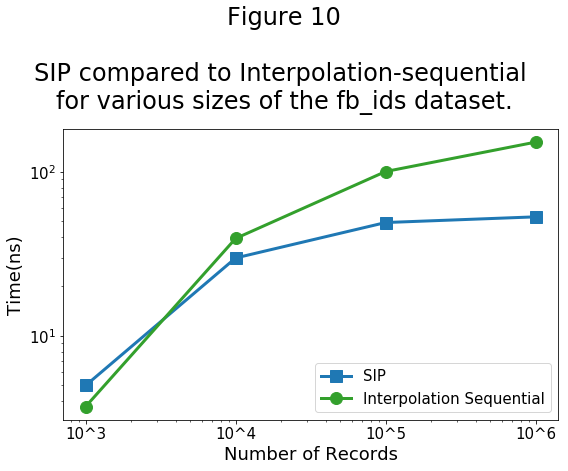

In [38]:
tsv="fig10.tsv"

datasetSizes = [3,4,5,6]

results=get_results(tsv)

# Group by algorithm
sipResults = results[0:(len(results)//2)]
isseqResults = results[(len(results)//2):len(results)]


fig, ax = plt.subplots(figsize=(8,5))

plt.plot([10**i for i in datasetSizes], sipResults, color=blue,marker="s", markersize=12, linewidth=3, label="SIP")
plt.plot([10**i for i in datasetSizes], isseqResults, color=green,marker="o", markersize=12, linewidth=3, label="Interpolation Sequential")

ax.set_ylabel('Time(ns)', size=18)
ax.set_xlabel('Number of Records', size=18)
ax.set_xscale('log')
ax.set_yscale('log')

# Set the position of the x ticks
ax.set_xticks([10**i for i in datasetSizes] )
ax.set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
ax.tick_params(axis='y', labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='lower right')
caption = "Figure 10\n\nSIP compared to Interpolation-sequential \nfor various sizes of the fb_ids dataset."
fig.suptitle(caption, fontsize=24, x=0.5, y=1.3)
plt.tight_layout()
plt.gcf().savefig('./figures/fig10.pdf', format='pdf',bbox_inches='tight')

#### Figure 11

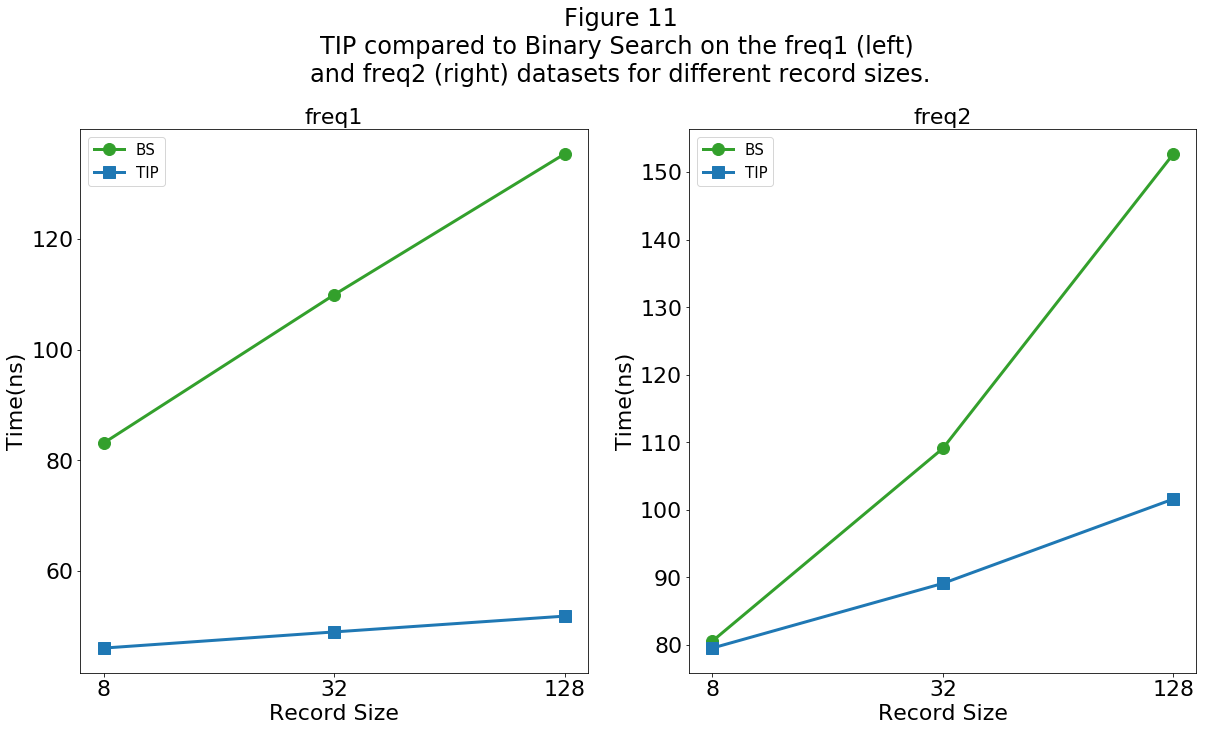

In [39]:
tsv="fig11.tsv"

results=get_results(tsv)

freq1Res = results[0:(len(results)//2)]
freq2Res = results[(len(results)//2):len(results)]

freq1ResultsTIP = freq1Res[0:(len(freq1Res)//2)]
freq1ResultsBS = freq1Res[(len(freq1Res)//2):len(freq1Res)]
freq2ResultsTIP = freq2Res[0:(len(freq2Res)//2)]
freq2ResultsBS = freq2Res[(len(freq2Res)//2):len(freq2Res)]

fig11Res = [ freq1ResultsBS, freq1ResultsTIP,  freq2ResultsBS, freq2ResultsTIP]


figs, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot([0,1,2], freq1ResultsBS,  color=green,marker="o", markersize=12, linewidth=3, label="BS")
axs[0].plot([0,1,2], freq1ResultsTIP,  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")

axs[1].plot([0,1,2], freq2ResultsBS,  color=green,marker="o", markersize=12, linewidth=3, label="BS")
axs[1].plot([0,1,2], freq2ResultsTIP,  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")

for i in range(0,2):
    axs[i].set_xticks([0,1,2])
    axs[i].set_xticklabels(["8","32","128"], size=22)
    axs[i].legend(prop={'size': 15}, loc='upper left') 
    axs[i].set_ylabel('Time(ns)', size=22)
    axs[i].set_xlabel('Record Size', size=22)
    axs[i].tick_params(axis='y', labelsize=22)

axs[0].set_title('freq1', size=22)
axs[1].set_title('freq2', size=22)

caption="Figure 11\nTIP compared to Binary Search on the freq1 (left) \nand freq2 (right) datasets for different record sizes."
figs.suptitle(caption, fontsize=24, x=0.5, y=1.05)

plt.gcf().savefig('./figures/fig11.pdf', format='pdf', bbox_inches='tight')

### Figure 12

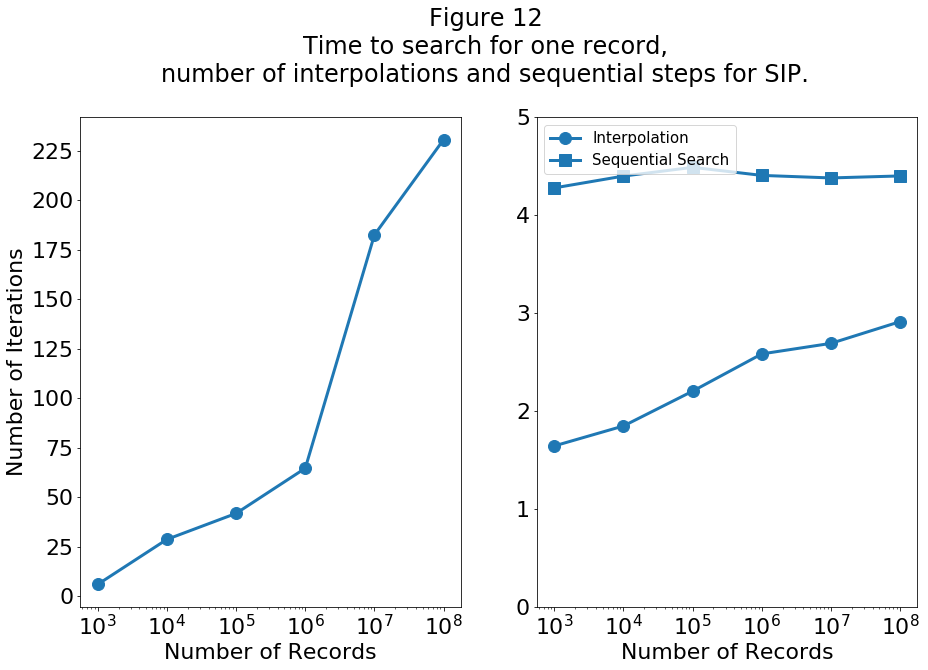

In [45]:
from matplotlib.ticker import MaxNLocator

tsv = "fig12.tsv"

iteration = []
steps = []
with open("experiments_results/"+tsv+".results", newline='') as file:
    for row in file:
        splitrow = row.split()
        if len(splitrow) == 2:
            iteration.append(float(splitrow[0]))
            steps.append(float(splitrow[1]))
            
results = get_results("fig12_times.tsv")

datasetSizes = [3, 4, 5, 6, 7, 8]
xticks = [10**i for i in datasetSizes]
xtickslabels = [str(10**i) for i in datasetSizes]

figs, axs = plt.subplots(1,2,figsize=(15,9))
axs[0].plot(xticks, results,  color=blue,marker="o", markersize=12, linewidth=3)

axs[1].plot(xticks, iteration,  color=blue,marker="o", markersize=12, linewidth=3, label="Interpolation")
axs[1].plot(xticks, steps,  color=blue,marker="s", markersize=12, linewidth=3, label="Sequential Search")

axs[0].set_ylabel('Duration(ns)', size=22)
axs[0].set_ylabel('Number of Iterations', size=22)
axs[1].legend(prop={'size': 15}, loc='upper left') 

for i in range(0,2):
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(xtickslabels, size=22)
    axs[i].set_xlabel('Number of Records', size=22)
    axs[i].tick_params(axis='y', labelsize=22)
    axs[i].set_xscale('log')
    axs[1].set_yticks([0,1,2,3,4,5])
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True))

caption="Figure 12\nTime to search for one record,\nnumber of interpolations and sequential steps for SIP."
figs.suptitle(caption, fontsize=24, x=0.5, y=1.05)

plt.gcf().savefig('./figures/fig12.pdf', format='pdf', bbox_inches='tight')

### Section 5.6

The figures presented bellow are not present in the paper, but they are mentioned in Section 5.6

#### Eytzinger vs SIP on UAR

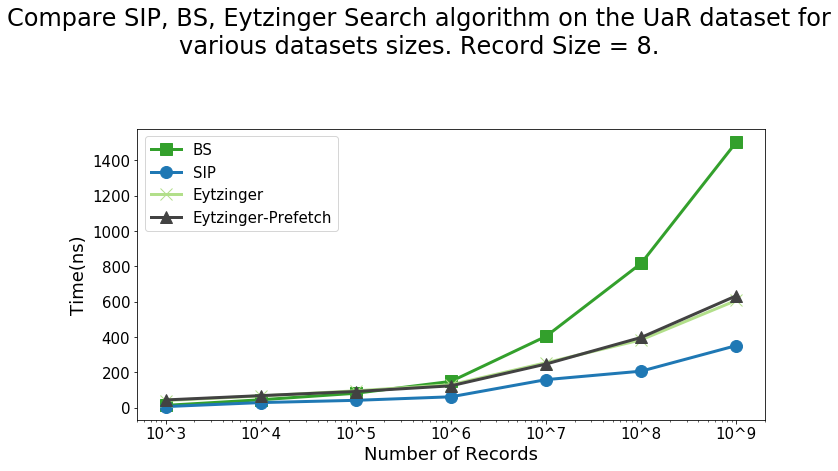

In [46]:
# Before running this please execute the Figure 6 cell

tsv="section56_SIP_UAR.tsv"

results = []
results.extend(fig6_results8)
results.extend(get_results(tsv))
algoResCount = len(results)//4

bsResults = results[0:algoResCount]
sipResults = results[algoResCount:algoResCount*2]
eytpResults = results[algoResCount*2:algoResCount*3]
eytResults = results[algoResCount*3:algoResCount*4]

fig, ax = plt.subplots(figsize=(10,5))
xticks = [10**i for i in range(algoResCount)]

plt.plot(xticks, bsResults,   color=green,  marker="s", markersize=12, linewidth=3, label="BS")
plt.plot(xticks, sipResults,  color=blue,   marker="o", markersize=12, linewidth=3, label="SIP")
plt.plot(xticks, eytResults, color=lgreen, marker="x", markersize=12, linewidth=3, label="Eytzinger")
plt.plot(xticks, eytpResults,  color=black,  marker="^", markersize=12, linewidth=3, label="Eytzinger-Prefetch")

ax.set_ylabel('Time(ns)', size=18)
ax.set_xlabel('Number of Records', size=18)
ax.set_xscale('log')

# Set the position of the x ticks
ax.set_xticks(xticks)
ax.set_xticklabels(["10^"+str(i) for i in [3+i for i in range(algoResCount)]], size=15)
ax.tick_params(axis='y', labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='upper left')
caption = "Compare SIP, BS, Eytzinger Search algorithm on the UaR dataset for\nvarious datasets sizes. Record Size = 8."
fig.suptitle(caption, fontsize=24, x=0.5, y=1.3)
plt.tight_layout()
plt.gcf().savefig('./figures/sec56_SIP_UaR.pdf', format='pdf',bbox_inches='tight')

#### Eytzinger vs SIP on fb_ids

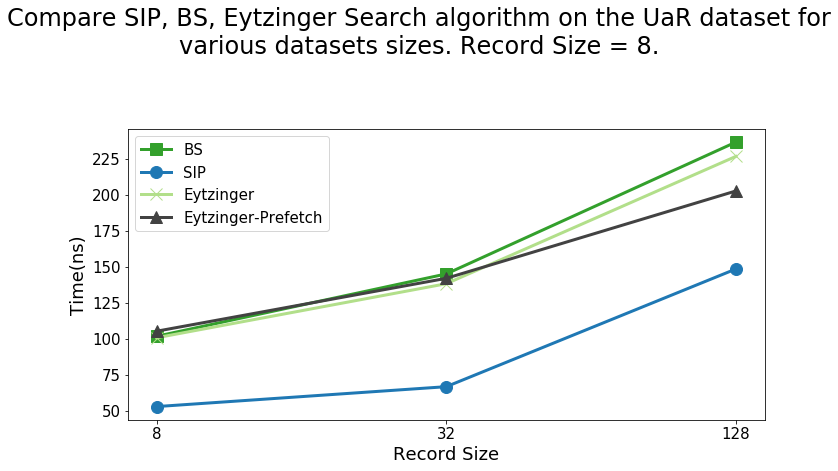

In [42]:
tsv="section56_SIP_FB.tsv"

results=get_results(tsv)

algoResCount = len(results)//4

bsResults = results[0:algoResCount]
sipResults = results[algoResCount:algoResCount*2]
eytpResults = results[algoResCount*2:algoResCount*3]
eytResults = results[algoResCount*3:algoResCount*4]

fig, ax = plt.subplots(figsize=(10,5))
xticks = [0, 1, 2]

plt.plot(xticks, bsResults,   color=green,  marker="s", markersize=12, linewidth=3, label="BS")
plt.plot(xticks, sipResults,  color=blue,   marker="o", markersize=12, linewidth=3, label="SIP")
plt.plot(xticks, eytpResults, color=lgreen, marker="x", markersize=12, linewidth=3, label="Eytzinger")
plt.plot(xticks, eytResults,  color=black,  marker="^", markersize=12, linewidth=3, label="Eytzinger-Prefetch")

ax.set_ylabel('Time(ns)', size=18)
ax.set_xlabel('Record Size', size=18)

# Set the position of the x ticks
ax.set_xticks(xticks)
ax.set_xticklabels(["8", "32", "128"], size=15)
ax.tick_params(axis='y', labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='upper left')
caption = "Compare SIP, BS, Eytzinger Search algorithm on the UaR dataset for\nvarious datasets sizes. Record Size = 8."
fig.suptitle(caption, fontsize=24, x=0.5, y=1.3)
plt.tight_layout()
plt.gcf().savefig('./figures/sec56_SIP_UaR.pdf', format='pdf',bbox_inches='tight')

#### Eytzinger vs TIP on fal, cfal

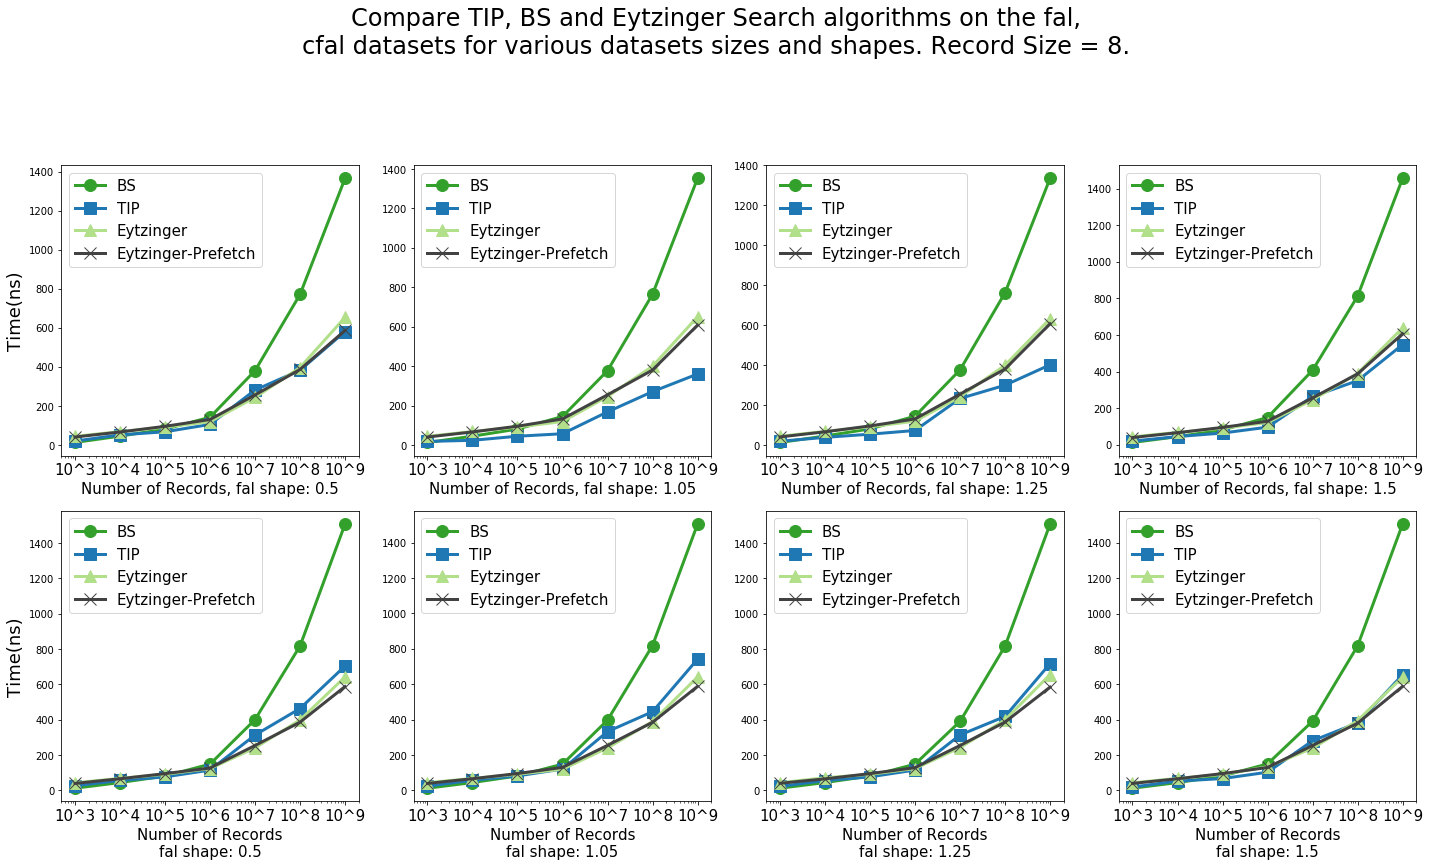

In [47]:
# Before running this please execute the Figure 9 cell

fal05=get_results("section56_TIP_05_fal.tsv")
fal105=get_results("section56_TIP_105_fal.tsv")
fal125=get_results("section56_TIP_125_fal.tsv")
fal15=get_results("section56_TIP_15_fal.tsv")

cfal05=get_results("section56_TIP_05_cfal.tsv")
cfal105=get_results("section56_TIP_105_cfal.tsv")
cfal125=get_results("section56_TIP_125_cfal.tsv")
cfal15=get_results("section56_TIP_15_cfal.tsv")


datasetSizes=[3,4,5,6,7]
if len(fal05) > 10:
    datasetSizes=[3,4,5,6,7,8,9]

shapes = [0.5,1.05,1.25,1.5]

resultAlgoLen = len(datasetSizes)

perPlot = [splitInTwo(fal05), splitInTwo(fal105), splitInTwo(fal125), splitInTwo(fal15),
           splitInTwo(cfal05), splitInTwo(cfal105), splitInTwo(cfal125), splitInTwo(cfal15)]
           
# Plot Helpers        
xticks=["10^"+str(i) for i in datasetSizes]
datasetSizesPlot=[]
for i in datasetSizes:
    datasetSizesPlot.append(10**i)


figs, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(0, len(shapes)):
    axs[0,i].plot(datasetSizesPlot, fig9PerPlot[i][0],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
    axs[0,i].plot(datasetSizesPlot, fig9PerPlot[i][1],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
    axs[0,i].plot(datasetSizesPlot, perPlot[i][0],  color=lgreen,marker="^", markersize=12, linewidth=3, label="Eytzinger")
    axs[0,i].plot(datasetSizesPlot, perPlot[i][1],  color=black,marker="x", markersize=12, linewidth=3, label="Eytzinger-Prefetch")
    axs[0,i].set_xscale('log')
    axs[0,i].set_xticks([10**i for i in datasetSizes] )
    axs[0,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[0,i].legend(prop={'size': 15}, loc='upper left')
    axs[0,i].set_xlabel('Number of Records, fal shape: '+ str(shapes[i]), size=15)


for i in range(0, len(shapes)):
    axs[1,i].plot(datasetSizesPlot, fig9PerPlot[len(shapes)+i][0],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
    axs[1,i].plot(datasetSizesPlot, fig9PerPlot[len(shapes)+i][1],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][0],  color=lgreen,marker="^", markersize=12, linewidth=3, label="Eytzinger")
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][1],  color=black,marker="x", markersize=12, linewidth=3, label="Eytzinger-Prefetch")
    axs[1,i].set_xlabel('Number of Records', size=18)
    axs[1,i].set_xscale('log')
    axs[1,i].set_xticks([10**i for i in datasetSizes] )
    axs[1,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[1,i].legend(prop={'size': 15}, loc='upper left')
    axs[1,i].set_xlabel('Number of Records\nfal shape: '+ str(shapes[i]), size=15)


axs[0,0].set_ylabel('Time(ns)', size=18)
axs[1,0].set_ylabel('Time(ns)', size=18)

caption = "Compare TIP, BS and Eytzinger Search algorithms on the fal,\ncfal datasets for various datasets sizes and shapes. Record Size = 8."

figs.suptitle(caption, fontsize=24, x=0.5, y=1.2)
plt.tight_layout()
plt.gcf().savefig('./figures/sec56_TIP.pdf', format='pdf', bbox_inches='tight')

#### Eytzinger vs TIP on freq1, freq2

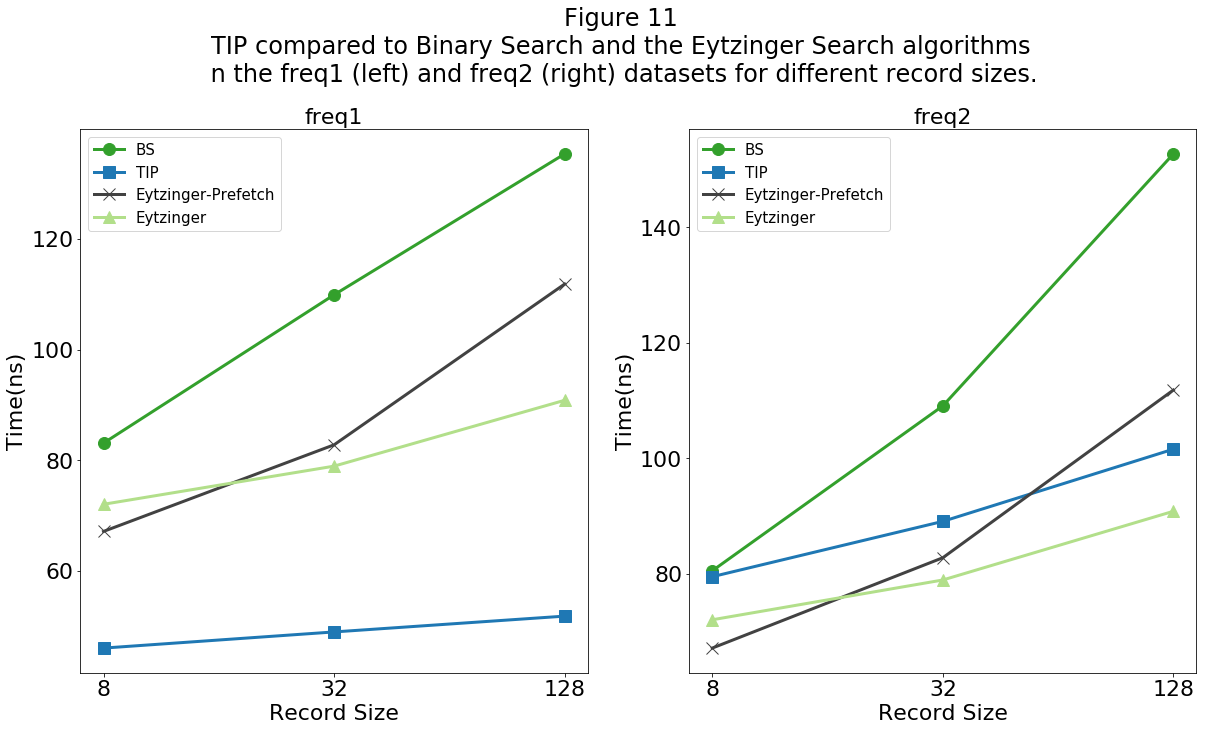

In [44]:
# Before running this please execute the Figure 11 cell

tsv="section56_TIP_Freq.tsv"

results=get_results(tsv)

freq1Res = results[0:(len(results)//2)]
freq2Res = results[(len(results)//2):len(results)]

freq1ResultsEytP = freq1Res[0:(len(freq1Res)//2)]
freq1ResultsEyt = freq1Res[(len(freq1Res)//2):len(freq1Res)]
freq2ResultsEytP = freq2Res[0:(len(freq2Res)//2)]
freq2ResultsEyt = freq2Res[(len(freq2Res)//2):len(freq2Res)]

figs, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot([0,1,2], fig11Res[0],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
axs[0].plot([0,1,2], fig11Res[1],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
axs[0].plot([0,1,2], freq1ResultsEytP,  color=black,marker="x", markersize=12, linewidth=3, label="Eytzinger-Prefetch")
axs[0].plot([0,1,2], freq1ResultsEyt,  color=lgreen,marker="^", markersize=12, linewidth=3, label="Eytzinger")


axs[1].plot([0,1,2], fig11Res[2],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
axs[1].plot([0,1,2], fig11Res[3],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
axs[1].plot([0,1,2], freq1ResultsEytP, color=black,marker="x", markersize=12, linewidth=3, label="Eytzinger-Prefetch")
axs[1].plot([0,1,2], freq1ResultsEyt,  color=lgreen,marker="^", markersize=12, linewidth=3, label="Eytzinger")

for i in range(0,2):
    axs[i].set_xticks([0,1,2])
    axs[i].set_xticklabels(["8","32","128"], size=22)
    axs[i].legend(prop={'size': 15}, loc='upper left') 
    axs[i].set_ylabel('Time(ns)', size=22)
    axs[i].set_xlabel('Record Size', size=22)
    axs[i].tick_params(axis='y', labelsize=22)

axs[0].set_title('freq1', size=22)
axs[1].set_title('freq2', size=22)

caption="Figure 11\nTIP compared to Binary Search and the Eytzinger Search algorithms\n n the freq1 (left) and freq2 (right) datasets for different record sizes."
figs.suptitle(caption, fontsize=24, x=0.5, y=1.05)

plt.gcf().savefig('./figures/section56_TIP_Freq.pdf', format='pdf', bbox_inches='tight')